# STARTING TWO CELLS IMPORT LIBRARIES AND DEFINE FUNCTIONS

In [1]:
import numpy as np
import pandas as pd
import ligo.skymap.io
import healpy as hp
import matplotlib.pyplot as plt

In [6]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np

import ligo.skymap.io
import healpy as hp
import matplotlib.pyplot as plt

skym = ligo.skymap.io.fits.read_sky_map('bns_astro/allsky/316.fits', distances=True)
skymap = hp.ud_grade(skym[0][0], 512)
print('Yes')


def get_probabilities(skymap, ra, dec, radius=0.35*u.deg):
    """
    Compute the probabilities covered in a grid of ra, dec with radius
    given a healpix skymap

    Pass the legal RA and Dec lists to this function

    Note: this radius is such that for the default sky grid (nside=128),
    fields overlap such that the area of the sky becomes 1.83 * 4pi steradians.
    As a result, the sum of probabilities will be 1.83
    """
    # fact : int, optional
    # Only used when inclusive=True. The overlapping test will be done at
    # the resolution fact*nside. For NESTED ordering, fact must be a power of 2, less than 2**30,
    # else it can be any positive integer. Default: 4.
    fact = 1
    nside_skymap = hp.npix2nside(len(skymap))
    tile_area = np.pi * radius.to(u.deg).value ** 2
    pixel_area = hp.nside2pixarea(nside_skymap, degrees=True)
    probabilities = np.zeros(len(ra))
    vecs = hp.ang2vec(ra.to(u.deg).value, dec.to(u.deg).value, lonlat=True)
    for i in range(len(ra)):
        sel_pix = hp.query_disc(nside_skymap, vecs[i], radius.to(
            u.rad).value, inclusive=True, fact=fact)
        probabilities[i] = np.sum(skymap[sel_pix]) * \
            tile_area / pixel_area / len(sel_pix)
        probabilities[i] = np.sum(skymap[sel_pix])/ len(sel_pix)
    return probabilities



def get_top_tiles(probabilities, frac=0.99):
    """
    probabilities may not add up to 1
    return indices of tiles that add up to frac of total
    """
    sortorder = np.argsort(probabilities)
    p_cum = np.cumsum(probabilities[sortorder]) / np.sum(probabilities)
    startind = np.where(p_cum > 1 - frac)[0][0]
    top_tiles = sortorder[startind:]
    return np.flip(top_tiles)




tiles = pd.read_csv('tiles_GIT_7.csv')
ralist, declist = np.array(tiles['RA_Center'])*u.deg, np.array(tiles['DEC_Center'])*u.deg

probs = get_probabilities(skymap, np.array([108.756])*u.deg, np.array([22.9])*u.deg)

skym = ligo.skymap.io.fits.read_sky_map('bayestar.multiorder.fits,2', distances=True)
skymap = hp.ud_grade(skym[0][2], 512)
vecs = hp.ang2vec(119.02, -22.898, lonlat=True)



tt = get_top_tiles(probs)
k=hp.vec2pix(512, vecs[0], vecs[1], vecs[2])
skymap[k]

probs = get_probabilities(skymap, ralist, declist)
tt = get_top_tiles(probs)
len(tt)


Yes


67251

# THIS CELL CALCULATES MEAN DISTANCE AND AREA FOR A GIVEN MAP. I DID THIS MANUALLY TOWARDS THE END AS SOME MAPS CAUSED PYTHON TO CRASH

## SEE COMMENT AFTER FUNCTION DEFINITION - THAT IS WHERE MAP NUMBER IS ENTERED


Distance = 600.2334862600225
Num GIT tiles =  5464
Sq deg =  5425.537704882412


<Figure size 1200x1000 with 0 Axes>

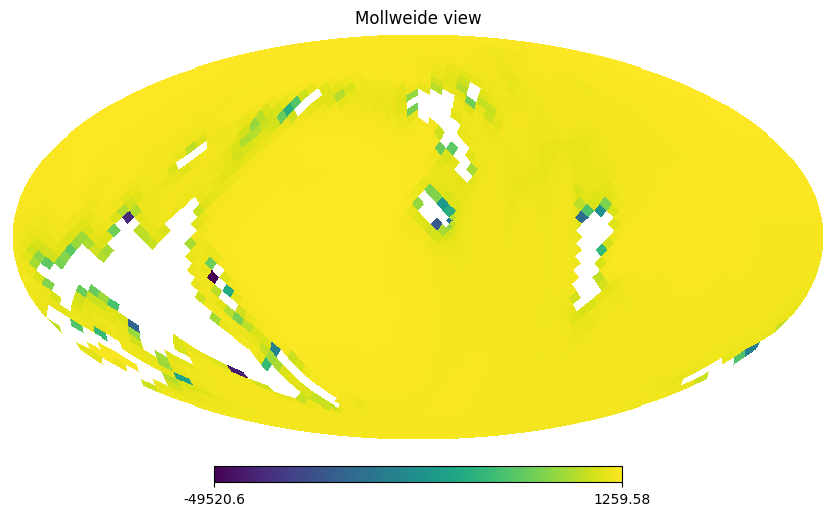

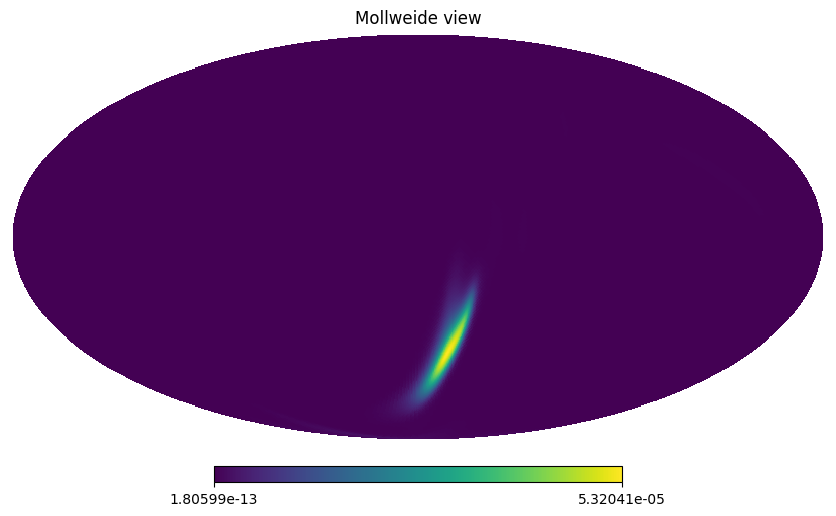

In [3]:
def get_top_tiles(probabilities, frac=0.99):
    """
    probabilities may not add up to 1
    return indices of tiles that add up to frac of total
    """
    sortorder = np.argsort(probabilities)
    p_cum = np.cumsum(probabilities[sortorder]) / np.sum(probabilities)
    startind = np.where(p_cum > 1 - frac)[0][0]
    top_tiles = sortorder[startind:]
    return np.flip(top_tiles)



#####------------------THE LINE BELOW TELLS MAP NUMBER TO DO CALCULATIONS FOR, HERE NSBH_1500-----------------#####
skym = ligo.skymap.io.fits.read_sky_map('nsbh_astro/allsky/1500.fits', distances=True)



plt.figure(figsize=(12,10))
hp.mollview(skym[0][1])
hp.mollview(skym[0][0])

tt = get_top_tiles(skym[0][0])
li = len(tt)
tt = tt[~np.isinf(skym[0][1][tt])]
print('Distance =',np.sum(skym[0][0][tt]*skym[0][1][tt])/np.sum(skym[0][0][tt]))
len(tt)

skymap = hp.ud_grade(skym[0][0], 512)
probs = get_probabilities(skymap, ralist, declist)
tt = get_top_tiles(probs, 0.99)
print('Num GIT tiles = ',len(tt))

tt = get_top_tiles(skymap, 0.99)
a = len(tt)*hp.nside2pixarea(512)*3282.8
print('Sq deg = ',a)

####  15, 48, 87, 25

# AREA CALCULATION END

In [6]:
skym = ligo.skymap.io.fits.read_sky_map('bns_astro/allsky/47.fits', distances=True)
skymap = skym[0][0]

np.sqrt(len(skymap)/12)

1024.0

# FETCH CSV FILES FOR GALAXY CATALOG AND MISSING MASS - DIRECTORY STRUCTURE IS DIFF ON GITHUB, PLS CHANGE ACCORDINGLY!

In [5]:
cat2 = pd.read_csv('../../new_reduced_galcat.csv')
new = pd.read_csv('../../missing_mass.csv')
cat2['Dist'] = cat2['DistMpc']

In [6]:
d1 = pd.read_csv('NSBH_full.csv')

names = d1['NSBH_num'][258:]

for name in names:
    
    skym = ligo.skymap.io.fits.read_sky_map('nsbh_astro/allsky/{}.fits'.format(name), distances=True)
    skymap = hp.ud_grade(skym[0][0], 512)
    
    #print('\n\n\n',name,'\n\n\n')

    tiles = pd.read_csv('tiles_GIT_7.csv')
    ralist, declist = np.array(tiles['RA_Center'])*u.deg, np.array(tiles['DEC_Center'])*u.deg
    probs = get_probabilities(skymap, ralist, declist)
    tt = get_top_tiles(probs, 0.99)
    print(name,len(tt))

1402 2873
1408 3400
1412 4201
1416 486
1417 384
1425 3295
1427 656
1428 1850
1430 3158
1437 465
1438 1030
1443 4913
1445 1572
1453 1728
1455 2732
1465 915
1480 3607
1483 3311
1487 3717


# MAIN CELL START

## AFTER FINDING GOOD LOCALIZATION MAPS, I USED TO LIST THEM IN NSBH_FULL.CSV AND RUN THE MASS-FILLING ON THOSE MAPS ONLY. 

## LOOP STATEMENT CAN BE MODIFIED AND EARLIER CELL USED TO INCLUDE AREA CALCULATION + IF STATEMENT TO RUN THE MASS FILLING IF SMALL AREA - then manually checking maps not needed


## Please make sure to change 'NSBH' to 'BNS' at a couple of places inside this cell when running for bns. 

In [13]:
d1 = pd.read_csv('NSBH_full.csv')

names = d1['NSBH_num'][258:]

for name in names:
    
    skym = ligo.skymap.io.fits.read_sky_map('nsbh_astro/allsky/{}.fits'.format(name), distances=True)
    skymap = hp.ud_grade(skym[0][0], 512)
    
    print('\n\n\n##############################',name,'#################################\n\n\n')

    tiles = pd.read_csv('tiles_GIT_7.csv')
    ralist, declist = np.array(tiles['RA_Center'])*u.deg, np.array(tiles['DEC_Center'])*u.deg
    probs = get_probabilities(skymap, ralist, declist)
    tt = get_top_tiles(probs, 0.99)
    len(tt)

    distmu = hp.ud_grade(skym[0][1], 512)
    distsigma = hp.ud_grade(skym[0][2], 512)
    prob2d = hp.ud_grade(skym[0][0], 512)


    radius = 0.35*u.deg
    fact = 1
    nside_skymap = 512

    tile_area = np.pi * radius.to(u.deg).value ** 2
    pixel_area = hp.nside2pixarea(nside_skymap, degrees=True)

    sigma_m = np.zeros(len(tt))

    mpcd = np.arange(0,1001,20)


    sigma_m_empty_dist = np.zeros(len(tt))
    sigma_m_empty_nodist = np.zeros(len(tt))
    sigma_m_nonempty = np.zeros(len(tt))


    for h in range(len(tt)):
        ra = ralist[tt[h]]
        dec = declist[tt[h]]

        vecs = hp.ang2vec(ra.to(u.deg).value, dec.to(u.deg).value, lonlat=True)

        sel_pix = hp.query_disc(nside_skymap, vecs, radius.to(u.rad).value, inclusive=True, fact=fact)

        masses1 = np.zeros(len(sel_pix))
        masses2 = np.zeros(len(sel_pix))
        masses3 = np.zeros(len(sel_pix))

        mpcd = np.arange(0,1001,20)

        for j in range(len(sel_pix)):
            i = sel_pix[j]
            currcat = (cat2[cat2.PIX_ID_512 == i][['Dist','Mstar']])

            currcat.reset_index(drop=True, inplace=True)

            indices = np.arange(0,50,1)
            filled = []

            distfact = 1/distsigma[i] * np.exp( -(mpcd-distmu[i])**2 / (2*distsigma[i]**2) )

            for k in range(len(currcat)):
                ind = np.argmin(np.abs(new['distcen'] - currcat['Dist'][k]))
                filled.append(ind)

            unfilled = np.delete(indices, filled)
            masses1[j] = prob2d[i]*(np.sum(currcat['Mstar']*distfact[filled]) + np.sum(new['masstofill'][unfilled]*distfact[unfilled] / (new['num_empty_pixels'][unfilled])))

            masses2[j] = prob2d[i]*np.sum(currcat['Mstar']*distfact[filled])

            masses3[j] = prob2d[i]*np.sum(currcat['Mstar'])

        prob2d[sel_pix] = 0.0

        sigma_m_empty_dist[h] = np.sum(masses2)
        sigma_m_empty_nodist[h] = np.sum(masses3)
        sigma_m_nonempty[h] = np.sum(masses1)
        print(h)
        
    df = pd.DataFrame({'Filled3D':sigma_m_nonempty, 'Unfilled3D':sigma_m_empty_dist, 'Unfilled2D':sigma_m_empty_nodist})
    df.to_csv('BNS_GalCat/aNSBH_{}.csv'.format(name))




############################## 1402 #################################





/home/tamojeet/.local/lib/python3.8/site-packages/healpy/pixelfunc.py:1978: RuntimeWarning: invalid value encountered in multiply
  map_out = np.sum(mr * goods, axis=1).astype(type_out)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


KeyboardInterrupt: 

# MAIN CELL END. 

## NEXT FEW CELLS DO THE GLOBAL CALCULATION FOR EACH MAP - CAN LEAVE IT TILL ALL MASS-FILLING ORDERINGS HAVE BEEN RUN, AND I CAN DO IT AFTER NEXT WEEK


In [9]:
latest = 234

d1 = pd.read_csv('NSBH_full.csv')
ar = []
dis = []
a1, a2, a3 = [],[],[]

nobs = 100

for n in d1['NSBH_num'][latest:]:
    cs = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(n))
    sigma_m_nonempty, sigma_m_empty_nodist, sigma_m_empty_dist = np.array(cs['Filled3D']), np.array(cs['Unfilled2D']), np.array(cs['Unfilled3D'])

    order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
    order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])
    order_all = np.flip(np.argsort(sigma_m_nonempty)[-nobs:])


    fullsum = np.sum(sigma_m_nonempty)
    a1.append(np.cumsum((sigma_m_nonempty)[order_nodist])[-1] / fullsum)
    a2.append(np.cumsum((sigma_m_nonempty)[order_dist])[-1] / fullsum)
    a3.append(np.cumsum((sigma_m_nonempty)[order_all])[-1] / fullsum)

    #print(k, a3[-1], a1[-1], a2[-1])
        
    if n in [511,559]:
        ar.append(0)
        dis.append(0)
        continue
        
    skym = ligo.skymap.io.fits.read_sky_map('nsbh_astro/allsky/{}.fits'.format(n), distances=True)
    print(n)
    skymap = hp.ud_grade(skym[0][0], 512)
    #probs = get_probabilities(skymap, ralist, declist)
    tt = get_top_tiles(skymap, 0.99)
    a = len(tt)*hp.nside2pixarea(512)*3282.8
    ar.append(a)
    
    tt = get_top_tiles(skym[0][0])
    li = len(tt)
    tt = tt[~np.isinf(skym[0][1][tt])]
    dist = (np.sum(skym[0][0][tt]*skym[0][1][tt])/np.sum(skym[0][0][tt]))
    dis.append(dist)
    
d1['DegArea'][latest:] = ar
d1['Mean_Dist'][latest:] = dis
d1['P_3dcat'][latest:] = a1
d1['P_2dcat'][latest:] = a2
d1['P_massfill'][latest:] = a3

1301
1303
1304
1307
1309
1313
1324
1335
1341
1342
1346
1368
1369
1381
1382
1388
901
917
918
920
931
932
937
952
1402
1408
1412
1416
1417
1425
1427
1428
1430
1437
1438
1443
1445
1453
1455
1465
1480
1483
1487


/tmp/ipykernel_521/2705286926.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['DegArea'][latest:] = ar
/tmp/ipykernel_521/2705286926.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Mean_Dist'][latest:] = dis
/tmp/ipykernel_521/2705286926.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['P_3dcat'][latest:] = a1
/tmp/ipykernel_521/2705286926.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [30]:
len(d1['P_massfill'][69:])

28

In [31]:
a1

[array([0.00176898, 0.00250768, 0.00342803, 0.00375225, 0.0048736 ,
        0.00495335, 0.00563384, 0.00580505, 0.00719634, 0.00844843,
        0.00946494, 0.01027143, 0.01159195, 0.0126187 , 0.01302669,
        0.01403772, 0.01519237, 0.01616444, 0.01688896, 0.01787018,
        0.01906013, 0.01993497, 0.02023518, 0.02096168, 0.02206227,
        0.02287586, 0.02309254, 0.02389955, 0.02449738, 0.02546372,
        0.02624934, 0.0272931 , 0.02799403, 0.02872609, 0.02888885,
        0.02959241, 0.03069818, 0.03154594, 0.03180133, 0.03220034,
        0.03260145, 0.03310889, 0.0339112 , 0.03491002, 0.03582037,
        0.03654842, 0.03733348, 0.03737464, 0.0379525 , 0.03842534,
        0.03923119, 0.03996326, 0.04060649, 0.04090547, 0.04148275,
        0.04181511, 0.04260419, 0.04329766, 0.04425619, 0.04523047,
        0.04621559, 0.04703963, 0.04785741, 0.04820818, 0.04894441,
        0.04970724, 0.05018818, 0.05036428, 0.05095125, 0.05140087,
        0.05149398, 0.05188815, 0.0524964 , 0.05

In [10]:
#d1 = pd.read_csv('BNS_full.csv')
p2d = []

for n in d1['NSBH_num'][latest:]:
    file = pd.read_csv('BNS_GalCat/NSBH_{}.csv'.format(n))
    #print(len(file))
    p2 = np.sum(file.Filled3D[:100]) / np.sum(file.Filled3D[:])
    p2d.append(p2)
p2d    
d1['P_2d'][latest:] = p2d
d1

/tmp/ipykernel_521/3254305211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['P_2d'][latest:] = p2d


,NSBH_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d
0,9,176.898556,0.600337,0.549279,0.585952,3729,2931.542120,0.558134
1,10,437.143024,0.141461,0.121218,0.126930,5166,2967.513652,0.130286
2,13,472.597237,0.718820,0.677132,0.671049,1460,933.764830,0.712768
3,14,292.474277,0.359173,0.181815,0.257413,2608,1372.190000,0.334255
4,15,278.666616,0.661672,0.619145,0.643372,1710,763.808196,0.641516
...,...,...,...,...,...,...,...,...
272,1455,509.512050,0.505516,0.470433,0.471494,2732,1918.424853,0.499373
273,1465,514.319607,0.859739,0.843044,0.849657,915,985.643568,0.851841
274,1480,414.976146,0.324223,0.287331,0.301675,3607,1510.279765,0.298025
275,1483,602.083646,0.576753,0.554957,0.558145,3311,2009.107733,0.574020


In [11]:
d1= d1.sort_values('NSBH_num')
d1

,NSBH_num,Mean_Dist,P_massfill,P_3dcat,P_2dcat,Area99,DegArea,P_2d
0,9,176.898556,0.600337,0.549279,0.585952,3729,2931.542120,0.558134
1,10,437.143024,0.141461,0.121218,0.126930,5166,2967.513652,0.130286
2,13,472.597237,0.718820,0.677132,0.671049,1460,933.764830,0.712768
3,14,292.474277,0.359173,0.181815,0.257413,2608,1372.190000,0.334255
4,15,278.666616,0.661672,0.619145,0.643372,1710,763.808196,0.641516
...,...,...,...,...,...,...,...,...
272,1455,509.512050,0.505516,0.470433,0.471494,2732,1918.424853,0.499373
273,1465,514.319607,0.859739,0.843044,0.849657,915,985.643568,0.851841
274,1480,414.976146,0.324223,0.287331,0.301675,3607,1510.279765,0.298025
275,1483,602.083646,0.576753,0.554957,0.558145,3311,2009.107733,0.574020


In [12]:
d1.to_csv('NSBH_full.csv')

In [18]:
np.where(d1.P_massfill < d1.P_2d)

(array([], dtype=int64),)

In [ ]:
f = pd.read_csv('')

In [9]:
d1.to_csv('BNS_full.csv')

## End of file writing